# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [76]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [77]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [78]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [79]:
html = browser.html

# Create a Beautiful Soup Object
soup = soup(html, 'html.parser')

In [80]:
# Extract all rows of data
data = soup.find()

In [81]:
#VARIABLE CONTIANING TABLE INFORMATION
tables = soup.find_all('tr', class_='data-row')

#TABLE HEADINGS
table_th = soup.find_all('th')
table_heading = [item.text for item in table_th]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [82]:
# Create an empty list
mars_list = []

# Loop through the scraped data to create a list of rows
for row in tables:
    data_row = row.text
    #SPLIT STRING BY DIVIDERS '\n'
    data_row_split = data_row.split('\n')
    #DROP FIRST AND LAST COLUMNS - BLANK
    data_row_split.pop(0)
    data_row_split.pop(-1)
    #APPEND REMAINING ROWS TO LIST
    mars_list.append(data_row_split)

In [83]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_list)
mars_df.columns = table_heading

In [84]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [85]:
#USING PANDAS TO CREATE DATAFRAME --> MUCH EASIER (WK 11 CLASS 3)
mars_df_pd = pd.read_html(url)
mars_df_pandas = mars_df_pd[0]
mars_df_pandas.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [86]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [87]:
# Change data types for data analysis
mars_df["terrestrial_date"] = mars_df["terrestrial_date"].astype("datetime64")
mars_df['sol'] = mars_df["sol"].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [88]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [89]:
# 1. How many months are there on Mars?
months = mars_df["month"].unique()
mars_months = len(months)
print(f"There are {mars_months} months on Mars.")

There are 12 months on Mars.


In [90]:
# 2. How many Martian days' worth of data are there?
days = mars_df["sol"].unique()
mars_days = len(days)
print(f"There are {mars_days} Martian days' worth of data.")

There are 1867 Martian days' worth of data.


In [91]:
# 3. What is the average low temperature by month?
temp = mars_df["min_temp"].groupby(mars_df["month"]).mean()
temp_df = pd.DataFrame(temp)

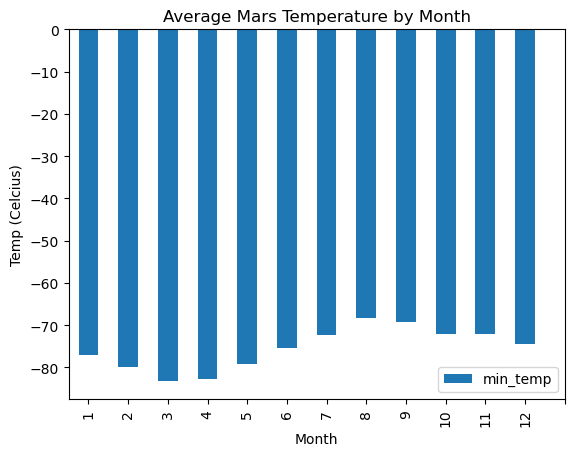

In [92]:
# Plot the average temperature by month
temp_df.plot(kind="bar")
plt.title("Average Mars Temperature by Month")
plt.ylabel("Temp (Celcius)")
plt.xlabel("Month")
plt.xticks(np.arange(0,13))
plt.savefig("Output/avg_mars_temp.png")
plt.show()

In [93]:
# Identify the coldest and hottest months in Curiosity's location
coldest = temp_df.loc[(temp_df["min_temp"] == min(temp_df["min_temp"])), :]
coldest_month = coldest.index

hottest = temp_df.loc[(temp_df["min_temp"] == max(temp_df["min_temp"])), :]
hottest_month = hottest.index

print(f"Month {coldest_month[0]} has the coldest average temperature at {(list(round(coldest['min_temp'],2)))} Celcius.")
print(f"Month {hottest_month[0]} has the hottest average temperature at {(list(round(hottest['min_temp'],2)))} Celcius.")

Month 3 has the coldest average temperature at [-83.31] Celcius.
Month 8 has the hottest average temperature at [-68.38] Celcius.


In [94]:
# 4. Average pressure by Martian month
pressure = mars_df["pressure"].groupby(mars_df["month"]).mean()
pressure_df = pd.DataFrame(pressure)

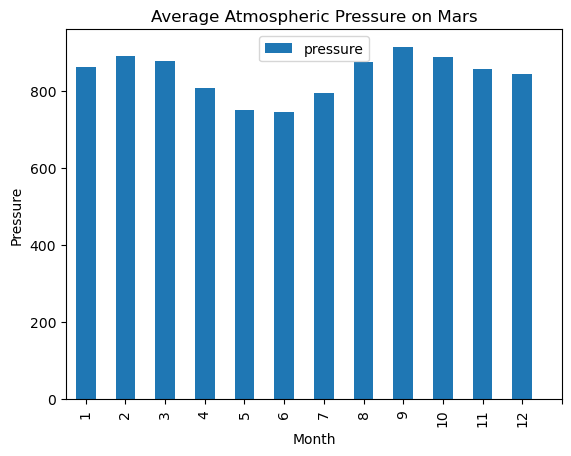

In [95]:
# Plot the average pressure by month
pressure.plot(kind="bar", label="pressure")
plt.title("Average Atmospheric Pressure on Mars")
plt.xlabel("Month")
plt.ylabel("Pressure")
plt.xticks(np.arange(0,13))
plt.legend()
plt.savefig("Output/avg_mars_pressure.png")
plt.show()

In [96]:
# Identify the month with the highest and lowest pressure in Curiosity's location
highest = pressure_df.loc[(pressure_df["pressure"] == max(pressure_df["pressure"])), :]
highest_month = highest.index

lowest = pressure_df.loc[(pressure_df["pressure"] == min(pressure_df["pressure"])), :]
lowest_month = lowest.index

print(f"Month {lowest_month[0]} has the lowest average atmospheric pressure at {(list(round(lowest['pressure'],2)))}.")
print(f"Month {highest_month[0]} has the highest average atmospheric pressure at {(list(round(highest['pressure'],2)))}.")

Month 6 has the lowest average atmospheric pressure at [745.05].
Month 9 has the highest average atmospheric pressure at [913.31].


In [97]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#IDENTIFIES FIRST INSTANCE OF JANUARY (START TIME)
earth_days_1 = mars_df.loc[(mars_df["month"] == 1), :]
date_start_1 = list(earth_days_1["terrestrial_date"])[0]

#STARTS DATAFRAME IN FEBRUARY TO SEARCH FOR NEXT JANUARY (END TIME)
earth_days_2 = mars_df.loc[(mars_df["month"] == 2), :]
date_start_2 = list(earth_days_2["terrestrial_date"])[0]

#LIMITS DATAFRAMES TO RESPECITVE DATES
new_days_1 = mars_df.loc[(mars_df["terrestrial_date"] >= date_start_1), :]
new_days_2 = mars_df.loc[(mars_df["terrestrial_date"] >= date_start_2), :]

#IDENTIFIES END DATE (FIRST INSTANCE OF NEXT JANUARY)
end_date_1 = new_days_2.loc[(mars_df["month"] == 1), :]
date_end_1 = list(end_date_1["terrestrial_date"])[0]

#SUBTRACTS DATES TO DETERMINE MARS YEAR IN EARTH DAYS
earth_days = date_end_1 - date_start_1
print(earth_days)

print(f"A visual estimate of minimum temperatures showed a distance between troughs of (475-1150), or roughly 675 Earth days in a Mars year.")
print(f"Subtracting dates from the data showed a more specific value with a Mars year equaling 687 Earth days.")

687 days 00:00:00
A visual estimate of minimum temperatures showed a distance between troughs of (475-1150), or roughly 675 Earth days in a Mars year.
Subtracting dates from the data showed a more specific value with a Mars year equaling 687 Earth days.


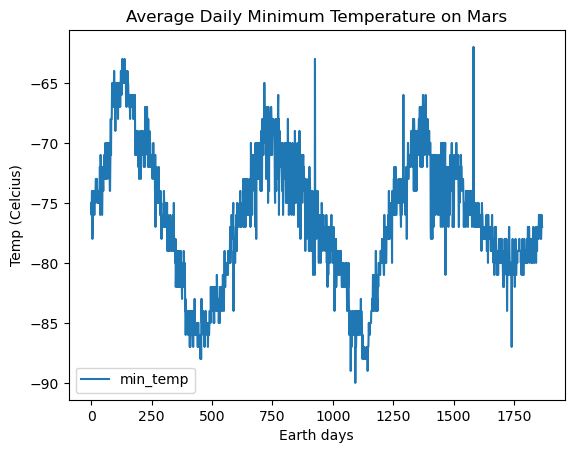

In [98]:
plt.plot(mars_df.index, mars_df["min_temp"], label="min_temp")
plt.title("Average Daily Minimum Temperature on Mars")
plt.ylabel("Temp (Celcius)")
plt.xlabel("Earth days")
plt.legend()
plt.savefig("Output/avg_min_daily_temp.png")
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [99]:
# Write the data to a CSV
mars_df.to_csv("Output/mars_data.csv", index=False, header=True)

In [100]:
browser.quit()